In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0-255) to (0-1) for better training
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 1D vector of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print(f"Training data shape: {x_train.shape}, Testing data shape: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 784), Testing data shape: (10000, 784)


In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Input layer (Flattened 28x28)
    keras.layers.Dense(128, activation='relu'),  # Hidden layer (128 neurons, ReLU)
    keras.layers.Dropout(0.2),  # Dropout layer (20% neurons randomly set to 0)
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8590 - loss: 0.4845 - val_accuracy: 0.9588 - val_loss: 0.1381
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9567 - loss: 0.1500 - val_accuracy: 0.9703 - val_loss: 0.0967
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9676 - loss: 0.1073 - val_accuracy: 0.9734 - val_loss: 0.0856
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9745 - loss: 0.0839 - val_accuracy: 0.9744 - val_loss: 0.0788
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9778 - loss: 0.0724 - val_accuracy: 0.9767 - val_loss: 0.0758
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9798 - loss: 0.0620 - val_accuracy: 0.9779 - val_loss: 0.0708
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9831 - loss: 0.0546 - val_accuracy: 0.9767 - val_loss: 0.0757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9838 - loss: 0.049

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0794
Test Accuracy: 0.9800


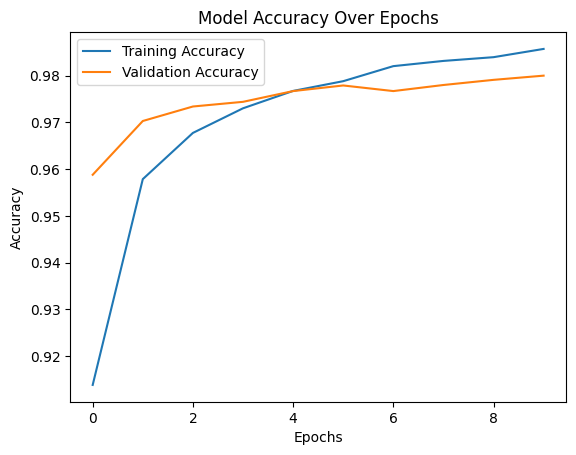

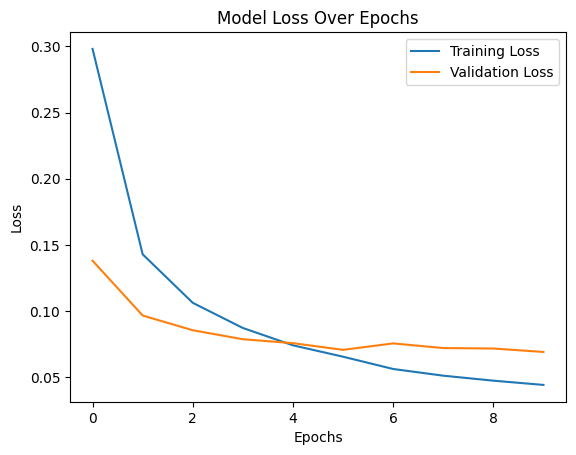

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss Over Epochs')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


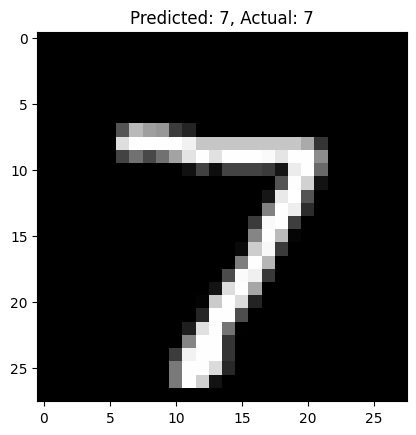

In [ ]:
predictions = model.predict(x_test)

# Show a sample prediction
sample_idx = 0  # Change index to test different images
plt.imshow(x_test[sample_idx].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[sample_idx])}, Actual: {y_test[sample_idx]}")
plt.show()
